### Problem Description

Write some details about the problem

## Packages

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


### Read Dataset

In [21]:
df = pd.read_excel('Online Retail.xlsx', encoding="ISO-8859-1", dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])


In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## EDA

In [23]:
missing_percentage =df.isnull().sum() * 100 / len(df)
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [24]:
# Removing None Customer IDs ... save clean dataframe with same variable `df`
df.dropna(axis=0, subset=['CustomerID'],inplace=True)


In [25]:
# Just for Checking 
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Q1: Which Country makes the most transactions?

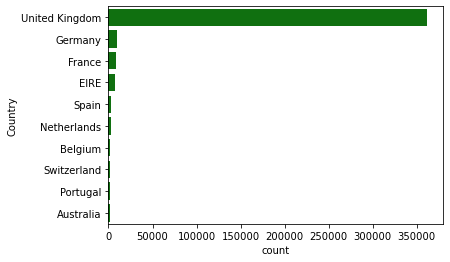

In [26]:
sns.countplot(y="Country", data=df, color="g",order=df.Country.value_counts().iloc[:10].index)


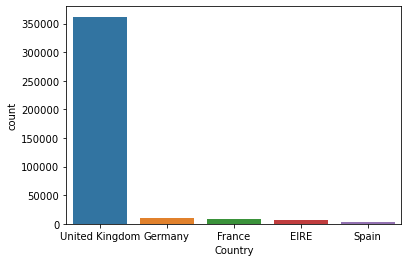

In [29]:
ax = sns.countplot(x="Country", data=df,order=df.Country.value_counts().iloc[:5].index)

### Q2: Show the Top 10 Customers how made the largest Revenue
### Q6: Calculate the Total Revenue for each Row

In [30]:
df['Revenue']=df['Quantity']*df['UnitPrice']
df_top_10=pd.DataFrame(df, columns=['Revenue','CustomerID'])
df_top_10=df_top_10.groupby(['CustomerID']).sum()
df_top_10=df_top_10.sort_values(by='Revenue',ascending=False)
df_top_10.head(10)

,Revenue
CustomerID,
14646,279489.02
18102,256438.49
17450,187482.17
14911,132572.62
12415,123725.45
14156,113384.14
17511,88125.38
16684,65892.08
13694,62653.10


### Q3: Show Top 5 frequent Customers

In [32]:
print('customer_id   count')
df.CustomerID.value_counts().head(5)

customer_id   count


17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
Name: CustomerID, dtype: int64

In [33]:
f"{df.shape[0]:,}"

'406,829'

### Q4: Create a histogram that reveals the count of words of 𝑫𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏

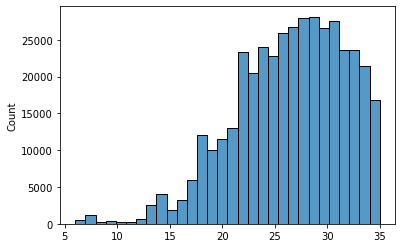

In [34]:
count = df['Description']
count=count.str.len()
sns.histplot(data=count, x=count.values,bins=30)


### Q5: Extract {𝑌𝑒𝑎𝑟, 𝑀𝑜𝑛𝑡ℎ, 𝑊𝑒𝑒𝑘, 𝑊𝑒𝑒𝑘𝐷𝑎𝑦, 𝐷𝑎𝑦, 𝐷𝑎𝑦𝑂𝑓𝑌𝑒𝑎𝑟,𝐷𝑎𝑡𝑒} features from 𝐼𝑛𝑣𝑜𝑖𝑐𝑒𝐷𝑎𝑡𝑒 feature
P.S: Date is based on Year, Month & Day features

In [35]:
df['InvoiceDate']=df['InvoiceDate'].apply(pd.to_datetime)
df['year'] = df['InvoiceDate'].dt.year
df["Quarter"] = df['InvoiceDate'].dt.quarter
df['month'] = df['InvoiceDate'].dt.month
df["Week"] = df['InvoiceDate'].dt.week
df["Weekday"] =df['InvoiceDate'].dt.weekday
df['day'] = df['InvoiceDate'].dt.day
df["Dayofyear"] =df['InvoiceDate'].dt.dayofyear
df["Date"]=df['InvoiceDate'].dt.date

In [36]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,year,Quarter,month,Week,Weekday,day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,12,48,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,12,48,2,1,335,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01


### Q7 & Q8: Aggregate Revenue & Quantity across the grouped_features

In [37]:
grouped_features = ["year", "Quarter","month", "Week", "Weekday", "Dayofyear", "day","StockCode", "Description"]


In [38]:
daily_data = pd.DataFrame(df.groupby(grouped_features).Quantity.sum(),columns=["Quantity"])
daily_data["Revenue"] = df.groupby(grouped_features).Revenue.sum()
daily_data = daily_data.reset_index()
daily_data.head(5)

,year,Quarter,month,Week,Weekday,Dayofyear,day,StockCode,Description,Quantity,Revenue
0,2010,4,12,48,2,335,1,10002,INFLATABLE POLITICAL GLOBE,60,51.00
1,2010,4,12,48,2,335,1,10125,MINI FUNKY DESIGN TAPES,2,1.70
2,2010,4,12,48,2,335,1,10133,COLOURING PENCILS BROWN TUBE,5,4.25
3,2010,4,12,48,2,335,1,16014,SMALL CHINESE STYLE SCISSOR,10,4.20
4,2010,4,12,48,2,335,1,16016,LARGE CHINESE STYLE SCISSOR,10,8.50
